# Import module


In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mordor_sd_assim import mordor_sd
import datetime
import litres
from save_tools import *
import properscoring as ps



# Reading of file containing sobol indices

In [2]:
def lec_compute_rmse(infile):
    """
   
    """
       
    print('lecture ', infile)
    data_0 = lec_tabs(infile)
    
    var     = data_0['var']
    mean      = data_0['mean']

    
    
    return var, mean


In [3]:
pourc_25 = list()
pourc_100 = list()  

annee=2008

for i in range (10):
    j=25
    file_in = "fichier_sauv_pert"+"_"+str(j)+"_"+str(annee+i)+".nc"
    var, mean = lec_compute_rmse(file_in)
    pourc = 100. * np.sqrt(var) / mean
    pourc_25.append( pourc )
    
    #print pourc

    j=100
    file_in = "fichier_sauv_pert"+"_"+str(j)+"_"+str(annee+i)+".nc"
    var, mean = lec_compute_rmse(file_in)
    pourc = 100. * np.sqrt(var) / mean
    pourc_100.append( pourc )

('lecture ', 'fichier_sauv_pert_25_2008.nc')
('lecture ', 'fichier_sauv_pert_100_2008.nc')
('lecture ', 'fichier_sauv_pert_25_2009.nc')
('lecture ', 'fichier_sauv_pert_100_2009.nc')
('lecture ', 'fichier_sauv_pert_25_2010.nc')
('lecture ', 'fichier_sauv_pert_100_2010.nc')
('lecture ', 'fichier_sauv_pert_25_2011.nc')
('lecture ', 'fichier_sauv_pert_100_2011.nc')
('lecture ', 'fichier_sauv_pert_25_2012.nc')
('lecture ', 'fichier_sauv_pert_100_2012.nc')
('lecture ', 'fichier_sauv_pert_25_2013.nc')
('lecture ', 'fichier_sauv_pert_100_2013.nc')
('lecture ', 'fichier_sauv_pert_25_2014.nc')
('lecture ', 'fichier_sauv_pert_100_2014.nc')
('lecture ', 'fichier_sauv_pert_25_2015.nc')
('lecture ', 'fichier_sauv_pert_100_2015.nc')
('lecture ', 'fichier_sauv_pert_25_2016.nc')
('lecture ', 'fichier_sauv_pert_100_2016.nc')
('lecture ', 'fichier_sauv_pert_25_2017.nc')
('lecture ', 'fichier_sauv_pert_100_2017.nc')


In [4]:
# # list of initial conditions

list_cond_init = ["npdt", "N", \
        "U_1", "L_1", "Z_1", "S_1", "sns_1", "snl_1", "tst_1", \
        "U_2", "L_2", "Z_2", "S_2", "sns_2", "snl_2", "tst_2", \
        "U_3", "L_3", "Z_3", "S_3", "sns_3", "snl_3", "tst_3", \
        "U_4", "L_4", "Z_4", "S_4", "sns_4", "snl_4", "tst_4", \
        "U_5", "L_5", "Z_5", "S_5", "sns_5", "snl_5", "tst_5", \
        "U_6", "L_6", "Z_6", "S_6", "sns_6", "snl_6", "tst_6", \
        "U_7", "L_7", "Z_7", "S_7", "sns_7", "snl_7", "tst_7", \
        "U_8", "L_8", "Z_8", "S_8", "sns_8", "snl_8", "tst_8", \
        "U_9", "L_9", "Z_9", "S_9", "sns_9", "snl_9", "tst_9", \
        "U_10", "L_10", "Z_10", "S_10", "sns_10", "snl_10", "tst_10"]

In [5]:
#list of parameters to plot
list_to_plot = ["S_1", "S_2", "S_3", "S_4", "S_5", "S_6", "S_7", "S_8", "S_9", "S_10"] #, 

In [6]:
# creation of tables containing only percentage of snow
nb_S    = 10
nb_year = 10
S_pourc25  = np.zeros((nb_S, nb_year))
S_pourc100 = np.zeros((nb_S, nb_year))

for i_y in range (nb_year): 
    for i_s in range(nb_S):
        i_tp = list_to_plot[i_s]
        ind = np.nonzero(i_tp == np.asarray(list_cond_init))[0]
        S_pourc25[i_s, i_y]  = pourc_25[i_y][ind]
        S_pourc100[i_s, i_y] = pourc_100[i_y][ind]

# mean and standar deviation
mean_pourc25  = np.zeros(nb_S)
mean_pourc100 = np.zeros(nb_S)
std_pourc25   = np.zeros(nb_S)
std_pourc100  = np.zeros(nb_S)

for i_s in range(nb_S):
    mean_pourc25[i_s]  = np.mean(S_pourc25[i_s, :])
    mean_pourc100[i_s] = np.mean(S_pourc100[i_s, :])
    std_pourc25[i_s]  = np.std(S_pourc25[i_s, :])
    std_pourc100[i_s] = np.std(S_pourc100[i_s, :])

# plot

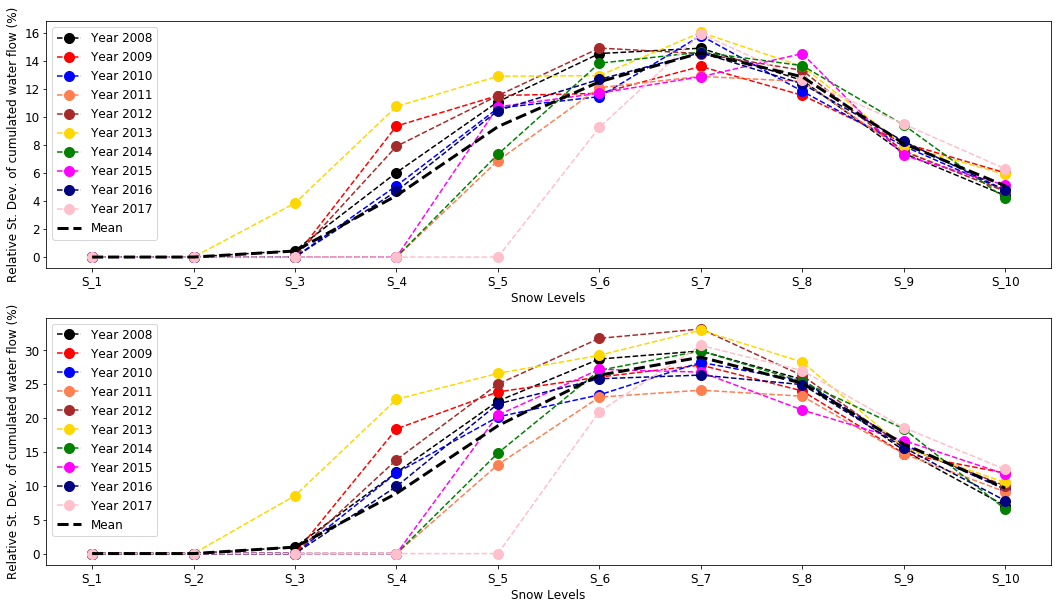

In [7]:
matplotlib.rcParams['font.size'] = 7.
# matplotlib.rcParams['figure.titlesize'] = 12.
matplotlib.rcParams['axes.labelsize'] = 12.
matplotlib.rcParams['xtick.labelsize'] = 12.
matplotlib.rcParams['ytick.labelsize'] = 12.


liste_color  = ["black", "red", "blue","coral", "brown", "gold", "green", "magenta","navy", "pink"]

# 25%
fig = plt.figure(1, figsize=(18, 10))
ax = plt.subplot(211)
for i in range (nb_S):
    plt.plot(list_to_plot,  S_pourc25[:, i], 'o--',markersize=10, color=liste_color[i], label="Year %i"%(2008+i))  

plt.plot(list_to_plot,  mean_pourc25[:], 'k--', label="Mean", linewidth=3.)  

plt.xlabel("Snow Levels",  fontsize=12)
plt.ylabel('Relative St. Dev. of cumulated water flow (%)', fontsize=12)
plt.legend(loc=2, prop={'size': 12})

#100%
ax = plt.subplot(212)
for i in range (nb_S):
    plt.plot(list_to_plot,  S_pourc100[:, i], 'o--',markersize=10, color=liste_color[i], label="Year %i"%(2008+i))  

plt.plot(list_to_plot,  mean_pourc100[:], 'k--', label="Mean", linewidth=3.)  

plt.xlabel("Snow Levels",  fontsize=12)
plt.ylabel('Relative St. Dev. of cumulated water flow (%)', fontsize=12)
plt.legend(loc=2, prop={'size': 12})
plt.savefig('indice_sobol_25_100.png',facecolor='w', edgecolor='w')

plt.show()



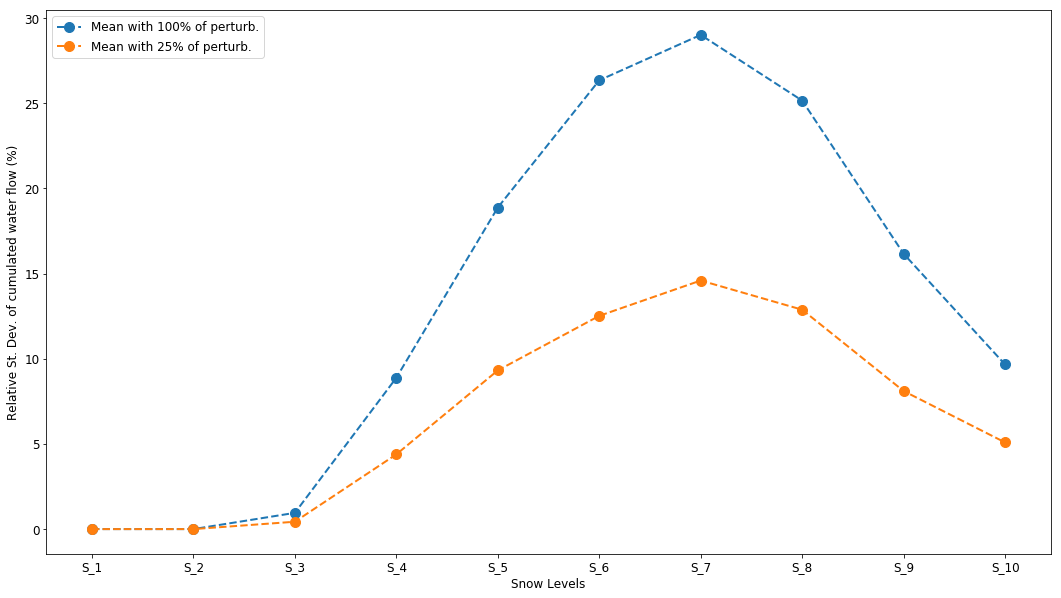

In [8]:
# mean and st dev of 25 and 100%


fig = plt.figure(1, figsize=(18, 10))
plt.plot(list_to_plot,  mean_pourc100[:], 'o--', markersize=10, label="Mean with 100% of perturb.", linewidth=2.)
#plt.plot(list_to_plot,  mean_pourc100[:]-std_pourc100[:], 'r--', label="St. Dev with 100% of perturb.")
#plt.plot(list_to_plot,  mean_pourc100[:]+std_pourc100[:], 'r--')
plt.plot(list_to_plot,  mean_pourc25[:], 'o--', markersize=10, label="Mean with 25% of perturb.", linewidth=2.)
#plt.plot(list_to_plot,  mean_pourc25[:]-std_pourc25[:], 'b--', label="St. Dev with 25% of perturb.")
#plt.plot(list_to_plot,  mean_pourc25[:]+std_pourc25[:], 'b--')

plt.xlabel("Snow Levels",  fontsize=12)
plt.ylabel('Relative St. Dev. of cumulated water flow (%)', fontsize=12)
plt.legend(loc=2, prop={'size': 12})
plt.savefig('indice_sobol_moy_10ans.png',facecolor='w', edgecolor='w')

plt.show()

# Another method of plotting the results

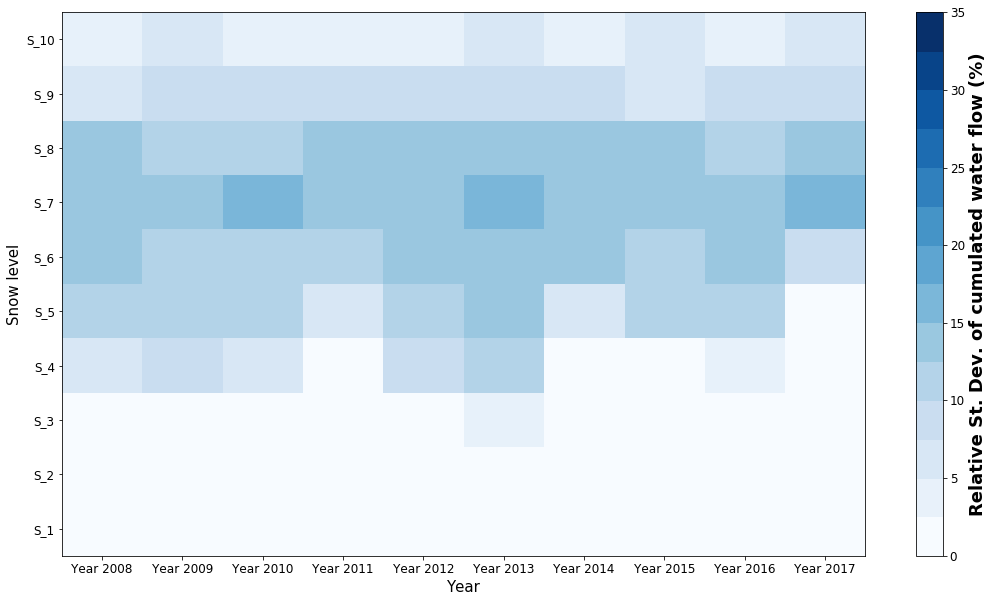

In [9]:
# S grid according to year with colorbar for 25%.
fig = plt.figure(1, figsize=(18, 10))

#cmap = matplotlib.cm.gray_r

cmap = plt.cm.get_cmap('Blues', 14)

cf = plt.imshow(S_pourc25[::-1,:], cmap=cmap, interpolation='nearest', \
    extent=[0, nb_S-1, 0, nb_year-1], aspect='auto', vmin = 0., vmax=35.)

xlist = []
for i in range(nb_year):
    xlist.append("Year %i"%(annee+i))

plt.xticks((np.asarray(range(nb_year)) + 0.5)*(nb_year-1)/nb_year , xlist, fontsize=12.)
plt.yticks((np.asarray(range(nb_S)) + 0.5)*(nb_S-1)/nb_S , list_to_plot, fontsize=12.)

cbar =plt.colorbar()
cbar.set_label('Relative St. Dev. of cumulated water flow (%)', fontsize=18, weight='bold')
cbar.ax.tick_params(labelsize=12)
  

plt.xlabel("Year",  fontsize=15)
plt.ylabel('Snow level', fontsize=15)
# plt.legend(loc=2, prop={'size': 12})
plt.show()


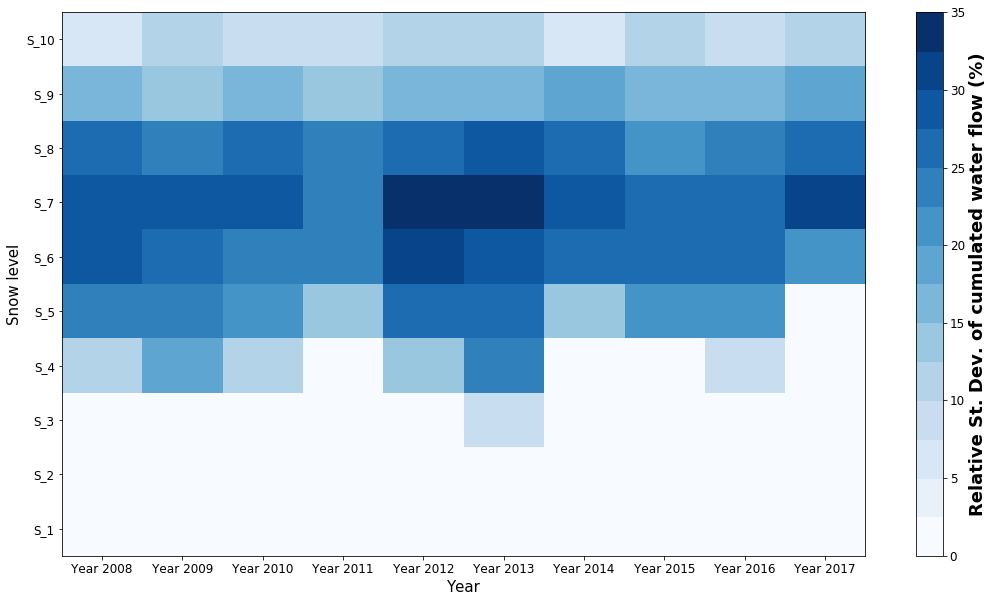

In [11]:

# S grid according to year with colorbar for 100%.
fig = plt.figure(1, figsize=(18, 10))

#cmap = matplotlib.cm.jet

cmap = plt.cm.get_cmap('Blues', 14)


cf = plt.imshow(S_pourc100[::-1,:], cmap=cmap, interpolation='nearest', \
    extent=[0, nb_S-1, 0, nb_year-1], aspect='auto', vmin = 0., vmax=35.)

xlist = []
for i in range(nb_year):
    xlist.append("Year %i"%(annee+i))

plt.xticks((np.asarray(range(nb_year)) + 0.5)*(nb_year-1)/nb_year , xlist, fontsize=12.)
plt.yticks((np.asarray(range(nb_S)) + 0.5)*(nb_S-1)/nb_S , list_to_plot, fontsize=12.)

cbar =plt.colorbar()
cbar.set_label('Relative St. Dev. of cumulated water flow (%)', fontsize=18, weight='bold')
cbar.ax.tick_params(labelsize=12)
  

plt.xlabel("Year",  fontsize=15)
plt.ylabel('Snow level', fontsize=15)
# plt.legend(loc=2, prop={'size': 12})
plt.show()